In [67]:
import numpy as np
import threading
import time
import pandas as pd
import matplotlib.pyplot as plt
import psutil

In [68]:

# Function to perform matrix multiplication with a constant matrix
def matrix_multiply(constant_matrix, num_threads):

    # Generate random matrix of size 1000x1000
    random_matrix = np.random.rand(1000, 1000)

    # Start timing
    start_time = time.time()

    # Multiply random matrix with constant matrix using the specified number of threads
    np.dot(random_matrix, constant_matrix)

    # End timing
    end_time = time.time()


    # Calculate time taken
    time_taken = end_time - start_time
    return time_taken

In [69]:
def measure_cpu_usage():
    cpu_usage = []
    for _ in range(10):  # Take 10 measurements
        cpu_usage.append(psutil.cpu_percent(interval=1))
    return sum(cpu_usage) / len(cpu_usage)

In [70]:
# Generate constant matrix of size 1000x1000
constant_matrix = np.random.rand(1000, 1000)

# Define the number of threads
num_threads = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [71]:
results = []
cpu_usages = []
for t in num_threads:
    time_taken = matrix_multiply(constant_matrix,t)
    cpu_usage = measure_cpu_usage()
    results.append(time_taken)
    cpu_usages.append(cpu_usage)

In [72]:
df = pd.DataFrame({'Threads': num_threads, 'Time Taken (Sec)': results, 'CPU Usage (%)': cpu_usages})
df


,Threads,Time Taken (Sec),CPU Usage (%)
0,1,0.063740,11.51
1,2,0.063100,11.07
2,3,0.059579,11.28
3,4,0.062405,10.91
4,5,0.058316,6.55
5,6,0.138332,7.58
6,7,0.059704,10.70
7,8,0.068135,10.93
8,9,0.059127,11.01
9,10,0.061496,11.02


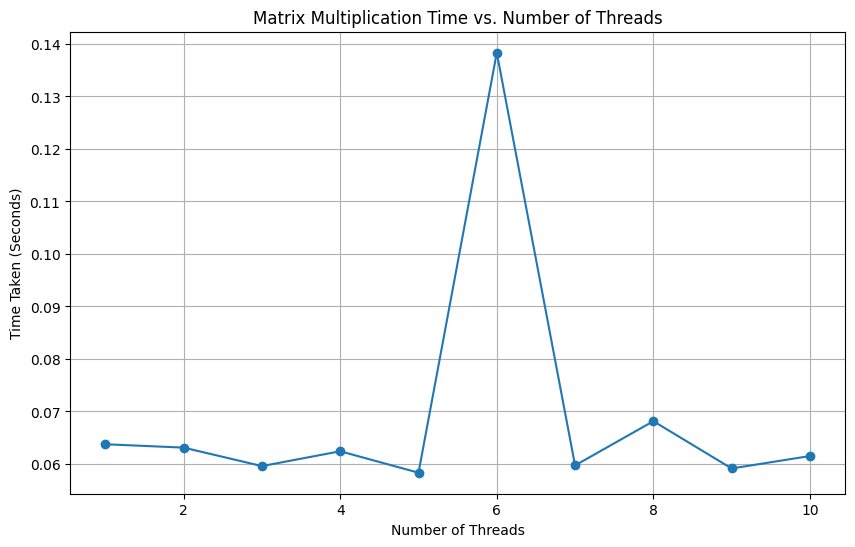

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(num_threads, results, marker='o')
plt.title('Matrix Multiplication Time vs. Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (Seconds)')
plt.grid(True)
plt.show()

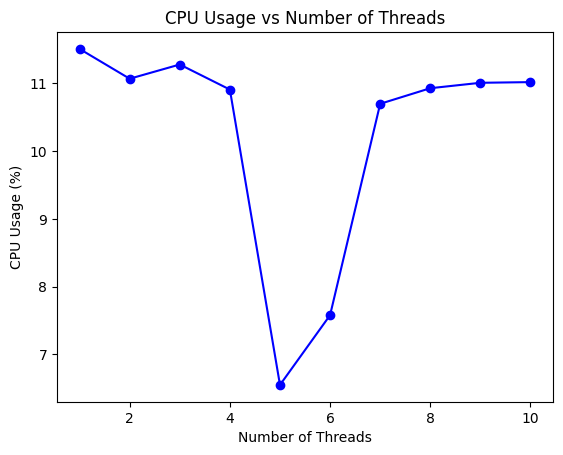

In [74]:
plt.figure()
plt.plot(num_threads, cpu_usages , marker='o', color='b')
plt.xlabel('Number of Threads')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage vs Number of Threads')

plt.show()

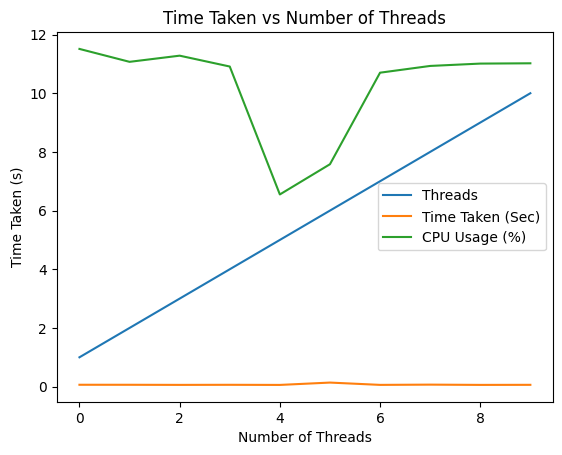

In [75]:
df.plot()
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (s)')
plt.title('Time Taken vs Number of Threads')
plt.show()

In [76]:
# Display the result table
print("\nResult Table:")
print(df)


Result Table:
   Threads  Time Taken (Sec)  CPU Usage (%)
0        1          0.063740          11.51
1        2          0.063100          11.07
2        3          0.059579          11.28
3        4          0.062405          10.91
4        5          0.058316           6.55
5        6          0.138332           7.58
6        7          0.059704          10.70
7        8          0.068135          10.93
8        9          0.059127          11.01
9       10          0.061496          11.02
